In [ ]:
from google.colab import files
import pandas as pd
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

df = pd.read_excel(fn)
df

Saving finaldata.xlsx to finaldata.xlsx
User uploaded file "finaldata.xlsx" with length 3194769 bytes


,flight_class,airline,arrival_time,departure_time,price,src_city,dest_city,duration,stops,date_of_departure
0,ECONOMY,Air India Express,01:55,12:55,3710,Delhi,Mumbai,13h 00m,1-stop,2024-10-01
1,ECONOMY,Vistara,16:25,14:20,4100,Delhi,Mumbai,02h 05m,Nonstop,2024-10-01
2,ECONOMY,Vistara,17:35,15:30,4100,Delhi,Mumbai,02h 05m,Nonstop,2024-10-01
3,ECONOMY,Vistara,04:45,02:30,4100,Delhi,Mumbai,02h 15m,Nonstop,2024-10-01
4,ECONOMY,Vistara,11:10,08:55,4100,Delhi,Mumbai,02h 15m,Nonstop,2024-10-01
...,...,...,...,...,...,...,...,...,...,...
69759,ECONOMY,Air India,19:10,10:25,21916,Kolkata,Chennai,08h 45m,1-stop,2024-11-29
69760,ECONOMY,Air India,16:35,10:25,22020,Kolkata,Chennai,06h 10m,1-stop,2024-11-29
69761,ECONOMY,Spice Jet,13:50,12:30,24016,Kolkata,Chennai,25h 20m,1-stop,2024-11-29
69762,ECONOMY,Air India,10:20,09:20,29176,Kolkata,Chennai,25h 00m,1-stop,2024-11-29


In [ ]:
df = df.dropna()
print(df)

      flight_class            airline arrival_time departure_time  price  \
0          ECONOMY  Air India Express        01:55          12:55   3710   
1          ECONOMY            Vistara        16:25          14:20   4100   
2          ECONOMY            Vistara        17:35          15:30   4100   
3          ECONOMY            Vistara        04:45          02:30   4100   
4          ECONOMY            Vistara        11:10          08:55   4100   
...            ...                ...          ...            ...    ...   
69759      ECONOMY          Air India        19:10          10:25  21916   
69760      ECONOMY          Air India        16:35          10:25  22020   
69761      ECONOMY          Spice Jet        13:50          12:30  24016   
69762      ECONOMY          Air India        10:20          09:20  29176   
69763      ECONOMY          Spice Jet        13:50          08:30  41970   

      src_city dest_city duration    stops date_of_departure  
0        Delhi    Mumbai

In [ ]:
df = df[df != "Unknown"].dropna()
print(df)

      flight_class            airline arrival_time departure_time  price  \
0          ECONOMY  Air India Express        01:55          12:55   3710   
1          ECONOMY            Vistara        16:25          14:20   4100   
2          ECONOMY            Vistara        17:35          15:30   4100   
3          ECONOMY            Vistara        04:45          02:30   4100   
4          ECONOMY            Vistara        11:10          08:55   4100   
...            ...                ...          ...            ...    ...   
69759      ECONOMY          Air India        19:10          10:25  21916   
69760      ECONOMY          Air India        16:35          10:25  22020   
69761      ECONOMY          Spice Jet        13:50          12:30  24016   
69762      ECONOMY          Air India        10:20          09:20  29176   
69763      ECONOMY          Spice Jet        13:50          08:30  41970   

      src_city dest_city duration    stops date_of_departure  
0        Delhi    Mumbai

In [ ]:
from datetime import datetime

df['date_of_departure'] = pd.to_datetime(df['date_of_departure'])

target_date = datetime(2024, 9, 30)
df['days_left'] = (df['date_of_departure'] - target_date).dt.days

df

,flight_class,airline,arrival_time,departure_time,price,src_city,dest_city,duration,stops,date_of_departure,days_left
0,ECONOMY,Air India Express,01:55,12:55,3710,Delhi,Mumbai,13h 00m,1-stop,2024-10-01,1
1,ECONOMY,Vistara,16:25,14:20,4100,Delhi,Mumbai,02h 05m,Nonstop,2024-10-01,1
2,ECONOMY,Vistara,17:35,15:30,4100,Delhi,Mumbai,02h 05m,Nonstop,2024-10-01,1
3,ECONOMY,Vistara,04:45,02:30,4100,Delhi,Mumbai,02h 15m,Nonstop,2024-10-01,1
4,ECONOMY,Vistara,11:10,08:55,4100,Delhi,Mumbai,02h 15m,Nonstop,2024-10-01,1
...,...,...,...,...,...,...,...,...,...,...,...
69759,ECONOMY,Air India,19:10,10:25,21916,Kolkata,Chennai,08h 45m,1-stop,2024-11-29,60
69760,ECONOMY,Air India,16:35,10:25,22020,Kolkata,Chennai,06h 10m,1-stop,2024-11-29,60
69761,ECONOMY,Spice Jet,13:50,12:30,24016,Kolkata,Chennai,25h 20m,1-stop,2024-11-29,60
69762,ECONOMY,Air India,10:20,09:20,29176,Kolkata,Chennai,25h 00m,1-stop,2024-11-29,60


In [ ]:
def update_stops(value):
  if "Nonstop" in str(value):
    return "zero"
  elif "2+-stop" in str(value):
    return "two_or_more"
  else:
    return "one"

df['stops'] = df['stops'].apply(update_stops)
print(df)

      flight_class            airline arrival_time departure_time  price  \
0          ECONOMY  Air India Express        01:55          12:55   3710   
1          ECONOMY            Vistara        16:25          14:20   4100   
2          ECONOMY            Vistara        17:35          15:30   4100   
3          ECONOMY            Vistara        04:45          02:30   4100   
4          ECONOMY            Vistara        11:10          08:55   4100   
...            ...                ...          ...            ...    ...   
69759      ECONOMY          Air India        19:10          10:25  21916   
69760      ECONOMY          Air India        16:35          10:25  22020   
69761      ECONOMY          Spice Jet        13:50          12:30  24016   
69762      ECONOMY          Air India        10:20          09:20  29176   
69763      ECONOMY          Spice Jet        13:50          08:30  41970   

      src_city dest_city duration stops date_of_departure  days_left  
0        Delhi  

In [ ]:
df['stops_num'] = df['stops'].map({'zero': 0, 'one': 1, 'two_or_more': 2})
df

,flight_class,airline,arrival_time,departure_time,price,src_city,dest_city,duration,stops,date_of_departure,days_left,stops_num
0,ECONOMY,Air India Express,01:55,12:55,3710,Delhi,Mumbai,13h 00m,one,2024-10-01,1,1
1,ECONOMY,Vistara,16:25,14:20,4100,Delhi,Mumbai,02h 05m,zero,2024-10-01,1,0
2,ECONOMY,Vistara,17:35,15:30,4100,Delhi,Mumbai,02h 05m,zero,2024-10-01,1,0
3,ECONOMY,Vistara,04:45,02:30,4100,Delhi,Mumbai,02h 15m,zero,2024-10-01,1,0
4,ECONOMY,Vistara,11:10,08:55,4100,Delhi,Mumbai,02h 15m,zero,2024-10-01,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69759,ECONOMY,Air India,19:10,10:25,21916,Kolkata,Chennai,08h 45m,one,2024-11-29,60,1
69760,ECONOMY,Air India,16:35,10:25,22020,Kolkata,Chennai,06h 10m,one,2024-11-29,60,1
69761,ECONOMY,Spice Jet,13:50,12:30,24016,Kolkata,Chennai,25h 20m,one,2024-11-29,60,1
69762,ECONOMY,Air India,10:20,09:20,29176,Kolkata,Chennai,25h 00m,one,2024-11-29,60,1


In [ ]:
unique_stops = df['stops'].unique()
print(unique_stops)

['one' 'zero' 'two_or_more']


In [ ]:
def update_duration(value):
  try:
    hours, minutes = value.split('h ')
    minutes = minutes.replace('m', '')
    total_hours = float(hours) + float(minutes) / 60
    return total_hours
  except:
    return None

df['duration'] = df['duration'].apply(update_duration).round(3)
print(df)


      flight_class            airline arrival_time departure_time  price  \
0          ECONOMY  Air India Express        01:55          12:55   3710   
1          ECONOMY            Vistara        16:25          14:20   4100   
2          ECONOMY            Vistara        17:35          15:30   4100   
3          ECONOMY            Vistara        04:45          02:30   4100   
4          ECONOMY            Vistara        11:10          08:55   4100   
...            ...                ...          ...            ...    ...   
69759      ECONOMY          Air India        19:10          10:25  21916   
69760      ECONOMY          Air India        16:35          10:25  22020   
69761      ECONOMY          Spice Jet        13:50          12:30  24016   
69762      ECONOMY          Air India        10:20          09:20  29176   
69763      ECONOMY          Spice Jet        13:50          08:30  41970   

      src_city dest_city  duration stops date_of_departure  days_left  \
0        Delhi

In [ ]:


airline_counts = df['airline'].value_counts()
print(airline_counts)


airline
Air India            35073
Indigo               17599
Vistara               6188
Air India Express     5409
Spice Jet              694
AkasaAir               524
Name: count, dtype: int64


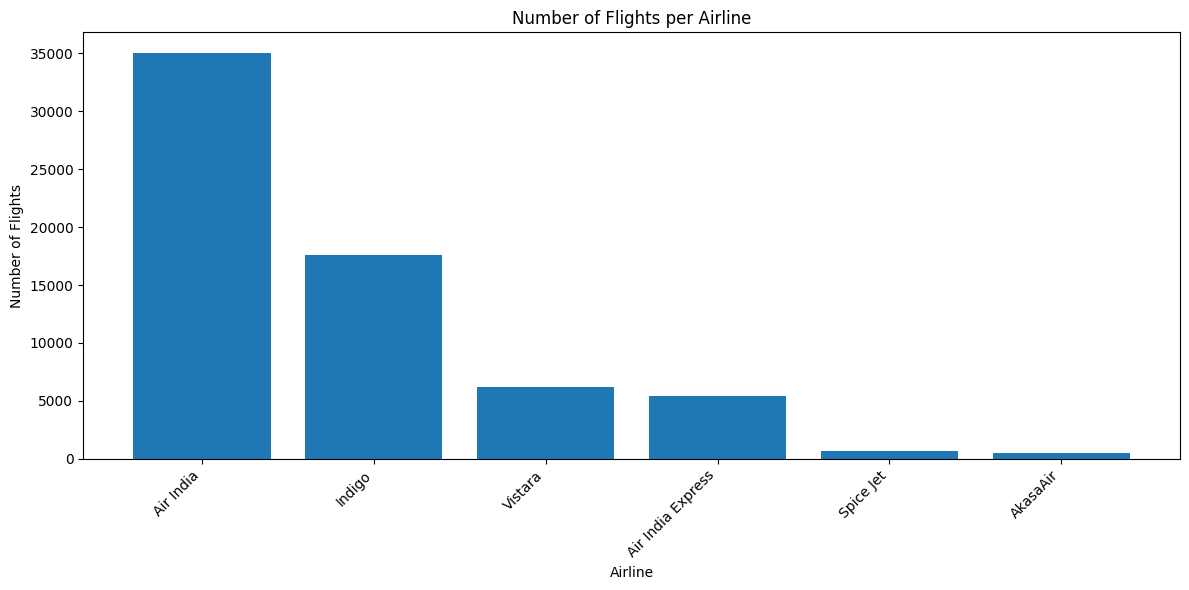

In [ ]:


import matplotlib.pyplot as plt

airline_counts = df['airline'].value_counts()

plt.figure(figsize=(12, 6))
plt.bar(airline_counts.index, airline_counts.values)
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.title('Number of Flights per Airline')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


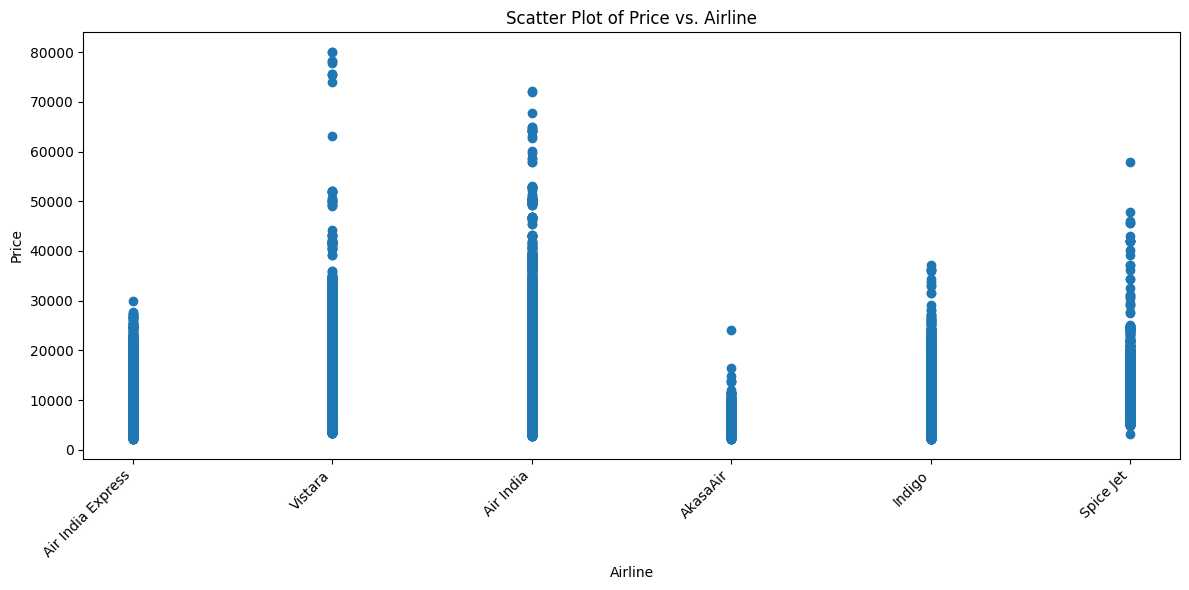

In [ ]:


plt.figure(figsize=(12, 6))
plt.scatter(df['airline'], df['price'])
plt.xlabel('Airline')
plt.ylabel('Price')
plt.title('Scatter Plot of Price vs. Airline')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
stops_count = df['stops'].value_counts()
print(stops_count)

stops
one            53289
zero           11510
two_or_more      688
Name: count, dtype: int64


In [ ]:


def update_departure_time(time_str):
  try:
    hour = int(time_str[:2])
    if 0 <= hour <= 3:
      return "late night"
    elif 4 <= hour <= 7:
      return "early morning"
    elif 8 <= hour <= 11:
      return "morning"
    elif 12 <= hour <= 15:
      return "afternoon"
    elif 16 <= hour <= 19:
      return "evening"
    elif 20 <= hour <= 23:
      return "night"
    else:
      return "unknown"
  except:
    return "unknown"

df['departure_time_category'] = df['departure_time'].apply(update_departure_time)
df


,flight_class,airline,arrival_time,departure_time,price,src_city,dest_city,duration,stops,date_of_departure,days_left,stops_num,departure_time_category
0,ECONOMY,Air India Express,01:55,12:55,3710,Delhi,Mumbai,13.000,one,2024-10-01,1,1,afternoon
1,ECONOMY,Vistara,16:25,14:20,4100,Delhi,Mumbai,2.083,zero,2024-10-01,1,0,afternoon
2,ECONOMY,Vistara,17:35,15:30,4100,Delhi,Mumbai,2.083,zero,2024-10-01,1,0,afternoon
3,ECONOMY,Vistara,04:45,02:30,4100,Delhi,Mumbai,2.250,zero,2024-10-01,1,0,late night
4,ECONOMY,Vistara,11:10,08:55,4100,Delhi,Mumbai,2.250,zero,2024-10-01,1,0,morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69759,ECONOMY,Air India,19:10,10:25,21916,Kolkata,Chennai,8.750,one,2024-11-29,60,1,morning
69760,ECONOMY,Air India,16:35,10:25,22020,Kolkata,Chennai,6.167,one,2024-11-29,60,1,morning
69761,ECONOMY,Spice Jet,13:50,12:30,24016,Kolkata,Chennai,25.333,one,2024-11-29,60,1,afternoon
69762,ECONOMY,Air India,10:20,09:20,29176,Kolkata,Chennai,25.000,one,2024-11-29,60,1,morning


In [ ]:
def update_arrival_time(time_str):
  try:
    hour = int(time_str[:2])
    if 0 <= hour <= 3:
      return "late night"
    elif 4 <= hour <= 7:
      return "early morning"
    elif 8 <= hour <= 11:
      return "morning"
    elif 12 <= hour <= 15:
      return "afternoon"
    elif 16 <= hour <= 19:
      return "evening"
    elif 20 <= hour <= 23:
      return "night"
    else:
      return "unknown"
  except:
    return "unknown"

df['arrival_time_category'] = df['arrival_time'].apply(update_arrival_time)
df

,flight_class,airline,arrival_time,departure_time,price,src_city,dest_city,duration,stops,date_of_departure,days_left,stops_num,departure_time_category,arrival_time_category
0,ECONOMY,Air India Express,01:55,12:55,3710,Delhi,Mumbai,13.000,one,2024-10-01,1,1,afternoon,late night
1,ECONOMY,Vistara,16:25,14:20,4100,Delhi,Mumbai,2.083,zero,2024-10-01,1,0,afternoon,evening
2,ECONOMY,Vistara,17:35,15:30,4100,Delhi,Mumbai,2.083,zero,2024-10-01,1,0,afternoon,evening
3,ECONOMY,Vistara,04:45,02:30,4100,Delhi,Mumbai,2.250,zero,2024-10-01,1,0,late night,early morning
4,ECONOMY,Vistara,11:10,08:55,4100,Delhi,Mumbai,2.250,zero,2024-10-01,1,0,morning,morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69759,ECONOMY,Air India,19:10,10:25,21916,Kolkata,Chennai,8.750,one,2024-11-29,60,1,morning,evening
69760,ECONOMY,Air India,16:35,10:25,22020,Kolkata,Chennai,6.167,one,2024-11-29,60,1,morning,evening
69761,ECONOMY,Spice Jet,13:50,12:30,24016,Kolkata,Chennai,25.333,one,2024-11-29,60,1,afternoon,afternoon
69762,ECONOMY,Air India,10:20,09:20,29176,Kolkata,Chennai,25.000,one,2024-11-29,60,1,morning,morning


In [ ]:


df = df.drop(['departure_time', 'arrival_time'], axis=1)
df


,flight_class,airline,price,src_city,dest_city,duration,stops,date_of_departure,days_left,stops_num,departure_time_category,arrival_time_category
0,ECONOMY,Air India Express,3710,Delhi,Mumbai,13.000,one,2024-10-01,1,1,afternoon,late night
1,ECONOMY,Vistara,4100,Delhi,Mumbai,2.083,zero,2024-10-01,1,0,afternoon,evening
2,ECONOMY,Vistara,4100,Delhi,Mumbai,2.083,zero,2024-10-01,1,0,afternoon,evening
3,ECONOMY,Vistara,4100,Delhi,Mumbai,2.250,zero,2024-10-01,1,0,late night,early morning
4,ECONOMY,Vistara,4100,Delhi,Mumbai,2.250,zero,2024-10-01,1,0,morning,morning
...,...,...,...,...,...,...,...,...,...,...,...,...
69759,ECONOMY,Air India,21916,Kolkata,Chennai,8.750,one,2024-11-29,60,1,morning,evening
69760,ECONOMY,Air India,22020,Kolkata,Chennai,6.167,one,2024-11-29,60,1,morning,evening
69761,ECONOMY,Spice Jet,24016,Kolkata,Chennai,25.333,one,2024-11-29,60,1,afternoon,afternoon
69762,ECONOMY,Air India,29176,Kolkata,Chennai,25.000,one,2024-11-29,60,1,morning,morning


In [ ]:


from_city_to_city_counts = df.groupby(['src_city', 'dest_city'])['airline'].count()
print(from_city_to_city_counts)


src_city   dest_city
Bengaluru  Chennai      1304
           Delhi        3009
           Hyderabad    2006
           Kolkata      2404
           Mumbai       2442
Chennai    Bengaluru    1182
           Delhi        2184
           Hyderabad    1752
           Kolkata      1824
           Mumbai       2141
Delhi      Bengaluru    2927
           Chennai      2217
           Hyderabad    2338
           Kolkata      2260
           Mumbai       3033
Hyderabad  Bengaluru    1996
           Chennai      1736
           Delhi        2344
           Kolkata      1856
           Mumbai       1930
Kolkata    Bengaluru    2503
           Chennai      1866
           Delhi        2392
           Hyderabad    1845
           Mumbai       2359
Mumbai     Bengaluru    2299
           Chennai      2135
           Delhi        3017
           Hyderabad    1949
           Kolkata      2237
Name: airline, dtype: int64


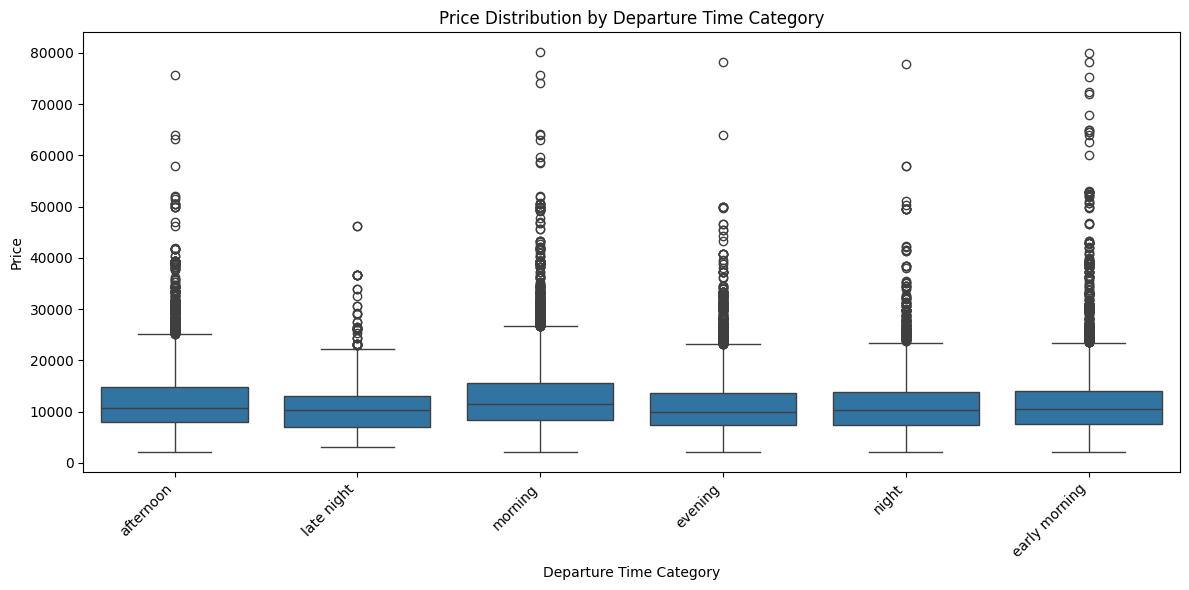

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='departure_time_category', y='price', data=df)
plt.xlabel('Departure Time Category')
plt.ylabel('Price')
plt.title('Price Distribution by Departure Time Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

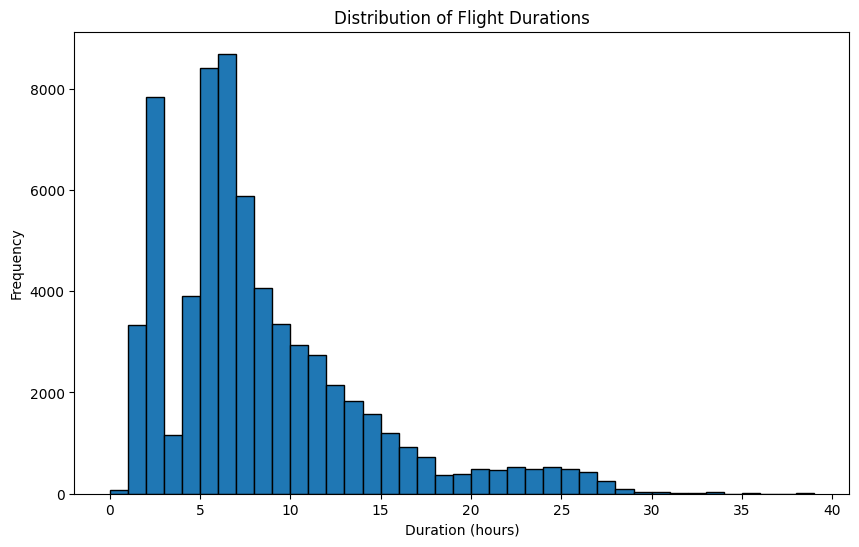

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['duration'], bins=range(0, int(df['duration'].max()) + 1, 1), edgecolor='black')
plt.xlabel('Duration (hours)')
plt.ylabel('Frequency')
plt.title('Distribution of Flight Durations')
plt.show()

In [ ]:
print(df.groupby(['airline','src_city','dest_city'],as_index=False)['price'].mean())

       airline   src_city  dest_city         price
0    Air India  Bengaluru    Chennai  11129.268440
1    Air India  Bengaluru      Delhi  12759.329320
2    Air India  Bengaluru  Hyderabad  12338.849126
3    Air India  Bengaluru    Kolkata  17705.148250
4    Air India  Bengaluru     Mumbai  11514.663703
..         ...        ...        ...           ...
151    Vistara     Mumbai  Bengaluru  14289.966825
152    Vistara     Mumbai    Chennai  20298.327160
153    Vistara     Mumbai      Delhi  13543.638968
154    Vistara     Mumbai  Hyderabad  11694.807692
155    Vistara     Mumbai    Kolkata  18421.029740

[156 rows x 4 columns]


In [ ]:


df = df.drop(['duration', 'stops'], axis=1)
df

,flight_class,airline,price,src_city,dest_city,date_of_departure,stops_num,departure_time_category,arrival_time_category
0,ECONOMY,Air India Express,3710,Delhi,Mumbai,2024-10-01,1,afternoon,late night
1,ECONOMY,Vistara,4100,Delhi,Mumbai,2024-10-01,0,afternoon,evening
2,ECONOMY,Vistara,4100,Delhi,Mumbai,2024-10-01,0,afternoon,evening
3,ECONOMY,Vistara,4100,Delhi,Mumbai,2024-10-01,0,late night,early morning
4,ECONOMY,Vistara,4100,Delhi,Mumbai,2024-10-01,0,morning,morning
...,...,...,...,...,...,...,...,...,...
69759,ECONOMY,Air India,21916,Kolkata,Chennai,2024-11-29,1,morning,evening
69760,ECONOMY,Air India,22020,Kolkata,Chennai,2024-11-29,1,morning,evening
69761,ECONOMY,Spice Jet,24016,Kolkata,Chennai,2024-11-29,1,afternoon,afternoon
69762,ECONOMY,Air India,29176,Kolkata,Chennai,2024-11-29,1,morning,morning


In [ ]:


import pandas as pd

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

df = remove_outliers_iqr(df, 'price')
df = remove_outliers_iqr(df, 'duration_minutes')

df

,airline,price,src_city,dest_city,stops_num,duration_minutes,departure_time_category,arrival_time_category
0,Spice Jet,5507,Delhi,Mumbai,0,135,night,night
1,Indigo,5403,Delhi,Mumbai,1,285,evening,night
2,Indigo,5403,Delhi,Mumbai,1,295,early morning,morning
3,Indigo,5403,Delhi,Mumbai,1,340,evening,late night
4,Indigo,5499,Delhi,Mumbai,0,140,late night,early morning
...,...,...,...,...,...,...,...,...
90752,Vistara,19416,Kolkata,Chennai,1,850,night,morning
90753,Spice Jet,19920,Kolkata,Chennai,1,320,morning,afternoon
90754,Air India,19908,Kolkata,Chennai,1,1025,evening,morning
90755,Air India,19908,Kolkata,Chennai,1,1135,evening,morning


In [ ]:


plt.figure(figsize=(10, 6))
plt.plot(df['days_left'], df['price'])
plt.xlabel('Days Left')
plt.ylabel('Price')
plt.title('Price vs. Days Left')
plt.grid(True)
plt.show()

In [ ]:
df_bk=df.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])

In [ ]:
x=df.drop(['price'],axis=1)
y=df['price']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((52389, 8), (13098, 8), (52389,), (13098,))

In [ ]:

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))

numerical_features = x_train.select_dtypes(include=['number']).columns
x_train_numerical = x_train[numerical_features]
x_test_numerical = x_test[numerical_features]

x_train_scaled = mmscaler.fit_transform(x_train_numerical)
x_test_scaled = mmscaler.transform(x_test_numerical)

x_train_scaled = pd.DataFrame(x_train_scaled, columns=numerical_features, index=x_train.index)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=numerical_features, index=x_test.index)

non_numerical_features = x_train.select_dtypes(exclude=['number']).columns
if len(non_numerical_features) > 0:
    x_train = pd.concat([x_train_scaled, x_train[non_numerical_features]], axis=1)
    x_test = pd.concat([x_test_scaled, x_test[non_numerical_features]], axis=1)
else:
    x_train = x_train_scaled
    x_test = x_test_scaled

price                      1.000000
stops_num                  0.383389
duration_minutes           0.217009
airline                    0.181539
dest_city                  0.052652
arrival_time_category      0.025564
src_city                   0.024573
departure_time_category    0.011422
Name: price, dtype: float64


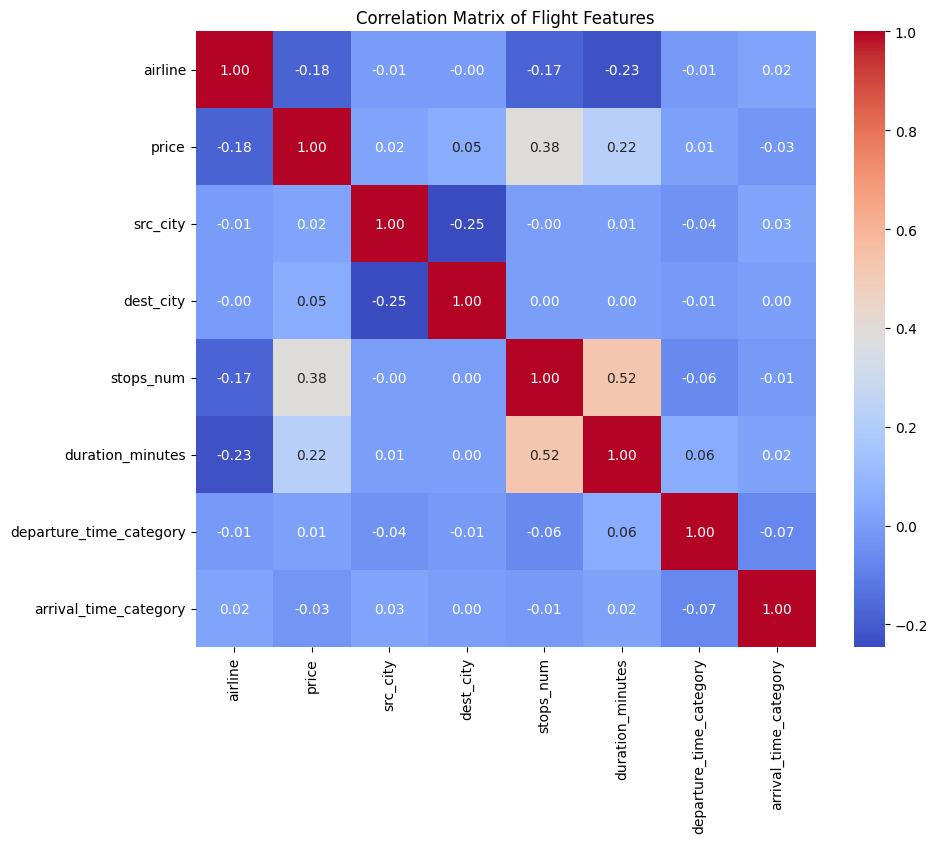

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df.corr()

correlations_with_price = abs(correlation_matrix['price']).sort_values(ascending=False)


print(correlations_with_price)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Flight Features')
plt.show()

In [ ]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


print(df.isnull().sum())


df.dropna(inplace=True)

df['date_of_departure'] = pd.to_datetime(df['date_of_departure'])
df['day_of_week'] = df['date_of_departure'].dt.dayofweek
df['month'] = df['date_of_departure'].dt.month

X = df[['airline', 'src_city', 'dest_city', 'duration', 'days_left', 'departure_time_category', 'arrival_time_category', 'day_of_week', 'month']]
y = df['price']


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


categorical_features = ['airline', 'src_city', 'dest_city', 'departure_time_category', 'arrival_time_category']
numerical_features = ['duration', 'days_left', 'day_of_week', 'month']


preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('pass', 'passthrough')
        ]), numerical_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ])

# pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('regressor', RandomForestRegressor(random_state=42, n_jobs=-1))
# ])


# param_grid = {
#     'regressor__n_estimators': [100, 200, 300],
#     'regressor__max_depth': [10, 20, 30],
#     'regressor__min_samples_split': [2, 5, 10],
#     'regressor__min_samples_leaf': [1, 2, 4]
# }


# grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='neg_mean_absolute_error', verbose=2, n_jobs=-1)


# grid_search.fit(X_train, y_train)


# best_model = grid_search.best_estimator_
# print("Best Parameters found by GridSearchCV:", grid_search.best_params_)



flight_class               0
airline                    0
price                      0
src_city                   0
dest_city                  0
duration                   0
stops                      0
date_of_departure          0
day_of_week                0
month                      0
days_left                  0
departure_time_category    0
arrival_time_category      0
dtype: int64


In [ ]:
df

,flight_class,airline,price,src_city,dest_city,duration,stops,date_of_departure,day_of_week,month,days_left,departure_time_category,arrival_time_category
0,ECONOMY,Air India Express,3710,Delhi,Mumbai,13.000,one,2024-10-01,1,10,1,afternoon,late night
1,ECONOMY,Vistara,4100,Delhi,Mumbai,2.083,zero,2024-10-01,1,10,1,afternoon,evening
2,ECONOMY,Vistara,4100,Delhi,Mumbai,2.083,zero,2024-10-01,1,10,1,afternoon,evening
3,ECONOMY,Vistara,4100,Delhi,Mumbai,2.250,zero,2024-10-01,1,10,1,late night,early morning
4,ECONOMY,Vistara,4100,Delhi,Mumbai,2.250,zero,2024-10-01,1,10,1,morning,morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69759,ECONOMY,Air India,21916,Kolkata,Chennai,8.750,one,2024-11-29,4,11,60,morning,evening
69760,ECONOMY,Air India,22020,Kolkata,Chennai,6.167,one,2024-11-29,4,11,60,morning,evening
69761,ECONOMY,Spice Jet,24016,Kolkata,Chennai,25.333,one,2024-11-29,4,11,60,afternoon,afternoon
69762,ECONOMY,Air India,29176,Kolkata,Chennai,25.000,one,2024-11-29,4,11,60,morning,morning


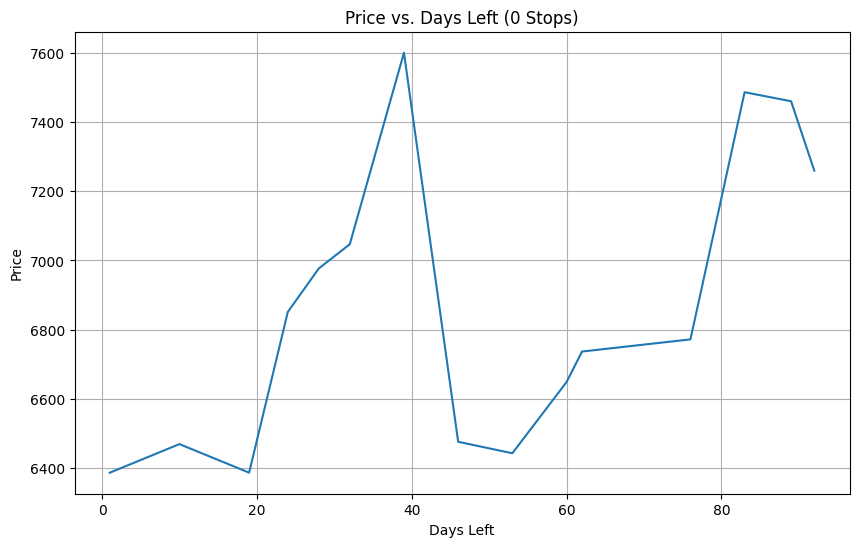

In [ ]:

average_prices = df[df['stops'] == 'zero'].groupby('days_left')['price'].mean()


plt.figure(figsize=(10, 6))
plt.plot(average_prices.index, average_prices.values)
plt.xlabel('Days Left')
plt.ylabel('Price')
plt.title('Price vs. Days Left (0 Stops)')
plt.grid(True)
plt.show()

In [ ]:
a={'Model Name':[], 'Mean_Absolute_Error_MAE':[] ,'Adj_R_Square':[] ,'Root_Mean_Squared_Error_RMSE':[] ,'Mean_Absolute_Percentage_Error_MAPE':[] ,'Mean_Squared_Error_MSE':[] ,'Root_Mean_Squared_Log_Error_RMSLE':[] ,'R2_score':[]}
Results=pd.DataFrame(a)
Results.head()

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score


In [ ]:
import numpy as np


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor

modelmlg = LinearRegression(n_jobs=-1)
modeldcr = DecisionTreeRegressor()
modelbag = BaggingRegressor(n_jobs=-1)
modelrfr = RandomForestRegressor(n_jobs=-1)
modelSVR = SVR()
modelXGR = xgb.XGBRegressor(n_jobs=-1)
modelKNN = KNeighborsRegressor(n_neighbors=5, n_jobs=-1)
modelETR = ExtraTreesRegressor(n_jobs=-1)
modelRE=Ridge()
modelLO=linear_model.Lasso(alpha=0.1)

modelGBR = GradientBoostingRegressor(loss='absolute_error', learning_rate=0.1, n_estimators=100, subsample=1.0,
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                     init=None, random_state=None, max_features=None,
                                     alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

MM = [modelmlg, modeldcr, modelrfr, modelKNN, modelETR, modelGBR, modelXGR, modelbag,modelRE,modelLO]


for models in MM:

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', models)
    ])

    models = pipeline


    # x_train_numeric = x_train.select_dtypes(include=np.number)
    # y_train_numeric = pd.to_numeric(y_train, errors='coerce')

    models.fit(x_train, y_train)

    # Convert x_test to numeric types if they contain datetime objects
    # x_test_numeric = x_test.select_dtypes(include=np.number)

    y_pred = models.predict(x_test)



    print('Model Name: ', models)



    from sklearn import metrics

    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))

    def MAPE (y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100



    result = MAPE(y_test, y_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')



    r_squared = round(metrics.r2_score(y_test, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1),6)
    print('Adj R Square: ', adjusted_r_squared)

    print('------------------------------------------------------------------------------------------------------------')
    #-------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
               'Adj_R_Square' : adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Absolute_Percentage_Error_MAPE' : result,
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'R2_score' : metrics.r2_score(y_test, y_pred)}
    Results = pd.concat([Results, pd.DataFrame([new_row])], ignore_index=True)
    #-------------------------------------------------------------------------------------------

Model Name:  Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('pass',
                                                                   'passthrough')]),
                                                  ['duration', 'days_left',
                                                   'day_of_week', 'month']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ign

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57176171764.09558, tolerance: 164625372.95626125
  model = cd_fast.sparse_enet_coordinate_descent(


In [ ]:
Results

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,"(ColumnTransformer(transformers=[('num',\n ...",3290.612938,0.304711,4719.708313,31.215294,2.227565e+07,8.459502,0.304807
1,"(ColumnTransformer(transformers=[('num',\n ...",1635.947657,0.619123,3493.213338,13.610961,1.220254e+07,8.158577,0.619175
2,"(ColumnTransformer(transformers=[('num',\n ...",3290.612938,0.304711,4719.708313,31.215294,2.227565e+07,8.459502,0.304807
3,"(ColumnTransformer(transformers=[('num',\n ...",1647.143253,0.614369,3514.947584,13.672334,1.235486e+07,8.164780,0.614422
4,"(ColumnTransformer(transformers=[('num',\n ...",1515.948259,0.758804,2779.825872,12.767584,7.727432e+06,7.930144,0.758837
5,"(ColumnTransformer(transformers=[('num',\n ...",2541.273034,0.503778,3987.226285,22.349742,1.589797e+07,8.290851,0.503846
6,"(ColumnTransformer(transformers=[('num',\n ...",1496.133885,0.720966,2989.930549,12.492200,8.939685e+06,8.003005,0.721004
7,"(ColumnTransformer(transformers=[('num',\n ...",2577.210163,0.439927,4235.990933,20.427758,1.794362e+07,8.351373,0.440004
8,"(ColumnTransformer(transformers=[('num',\n ...",2029.029891,0.683009,3186.806446,17.341275,1.015574e+07,8.066775,0.683053
9,"(ColumnTransformer(transformers=[('num',\n ...",1594.844252,0.735729,2909.764827,13.417336,8.466731e+06,7.975828,0.735765


In [ ]:
models=['LinearRegression','DecisionTreeRegressor','RandomForestRegressor','KNeighborsRegressor','ExtraTreesRegressor','GradientBoostingRegressor','XGBRegressor','BaggingRegressor','Ridge Regression','Lasso Regression']
result=pd.DataFrame({'Model_Name':models})
result['Adj_R_Square']=Results['Adj_R_Square']
result['Mean_Absolute_Error_MAE']=Results['Mean_Absolute_Error_MAE']
result['Root_Mean_Squared_Error_RMSE']=Results['Root_Mean_Squared_Error_RMSE']
result['Mean_Absolute_Percentage_Error_MAPE']=Results['Mean_Absolute_Percentage_Error_MAPE']
result['Mean_Squared_Error_MSE']=Results['Mean_Squared_Error_MSE']
result['Root_Mean_Squared_Log_Error_RMSLE']=Results['Root_Mean_Squared_Log_Error_RMSLE']
result['R2_score']=Results['R2_score']
result=result.sort_values(by='Adj_R_Square',ascending=False).reset_index(drop=True)
result

,Model_Name,Adj_R_Square,Mean_Absolute_Error_MAE,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,ExtraTreesRegressor,0.758804,1515.948259,2779.825872,12.767584,7.727432e+06,7.930144,0.758837
1,Lasso Regression,0.735729,1594.844252,2909.764827,13.417336,8.466731e+06,7.975828,0.735765
2,XGBRegressor,0.720966,1496.133885,2989.930549,12.492200,8.939685e+06,8.003005,0.721004
3,Ridge Regression,0.683009,2029.029891,3186.806446,17.341275,1.015574e+07,8.066775,0.683053
4,DecisionTreeRegressor,0.619123,1635.947657,3493.213338,13.610961,1.220254e+07,8.158577,0.619175
5,KNeighborsRegressor,0.614369,1647.143253,3514.947584,13.672334,1.235486e+07,8.164780,0.614422
6,GradientBoostingRegressor,0.503778,2541.273034,3987.226285,22.349742,1.589797e+07,8.290851,0.503846
7,BaggingRegressor,0.439927,2577.210163,4235.990933,20.427758,1.794362e+07,8.351373,0.440004
8,LinearRegression,0.304711,3290.612938,4719.708313,31.215294,2.227565e+07,8.459502,0.304807
9,RandomForestRegressor,0.304711,3290.612938,4719.708313,31.215294,2.227565e+07,8.459502,0.304807


In [ ]:
df

,flight_class,airline,price,src_city,dest_city,duration,stops,date_of_departure,day_of_week,month,days_left,departure_time_category,arrival_time_category
0,ECONOMY,Air India Express,3710,Delhi,Mumbai,13.000,one,2024-10-01,1,10,1,afternoon,late night
1,ECONOMY,Vistara,4100,Delhi,Mumbai,2.083,zero,2024-10-01,1,10,1,afternoon,evening
2,ECONOMY,Vistara,4100,Delhi,Mumbai,2.083,zero,2024-10-01,1,10,1,afternoon,evening
3,ECONOMY,Vistara,4100,Delhi,Mumbai,2.250,zero,2024-10-01,1,10,1,late night,early morning
4,ECONOMY,Vistara,4100,Delhi,Mumbai,2.250,zero,2024-10-01,1,10,1,morning,morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69759,ECONOMY,Air India,21916,Kolkata,Chennai,8.750,one,2024-11-29,4,11,60,morning,evening
69760,ECONOMY,Air India,22020,Kolkata,Chennai,6.167,one,2024-11-29,4,11,60,morning,evening
69761,ECONOMY,Spice Jet,24016,Kolkata,Chennai,25.333,one,2024-11-29,4,11,60,afternoon,afternoon
69762,ECONOMY,Air India,29176,Kolkata,Chennai,25.000,one,2024-11-29,4,11,60,morning,morning


In [ ]:
df_for_correlation = df.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df_for_correlation.columns:
    if df_for_correlation[col].dtype=='object':
        df_for_correlation[col]=le.fit_transform(df_for_correlation[col])

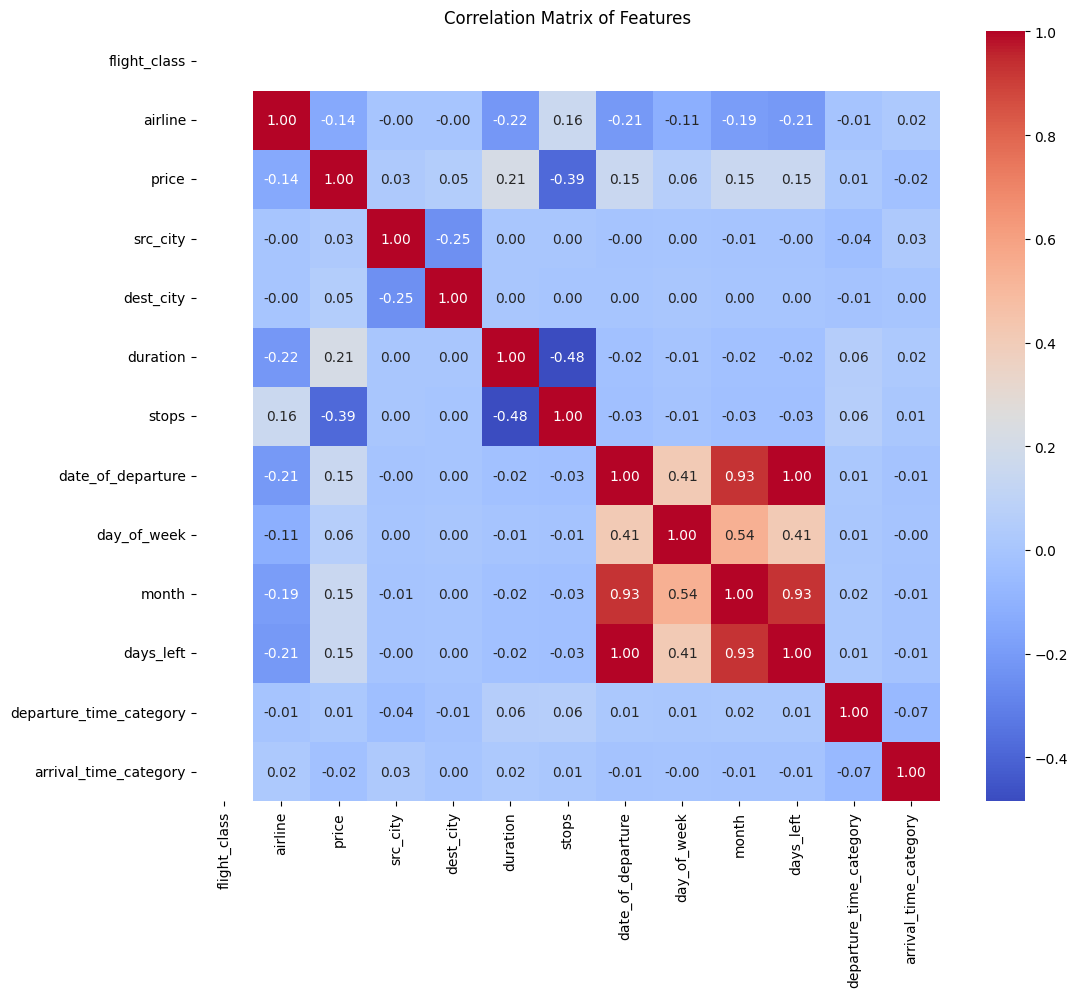

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np





# numeric_df = df.select_dtypes(include=np.number)


correlation_matrix = df_for_correlation.corr()


plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

In [ ]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import LabelEncoder


rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)


le = LabelEncoder()


# rf_model.fit(x_train, y_train)



results = {}
for feature_name in x_train.columns:
    feature_data_train = x_train[[feature_name]].copy()
    feature_data_test = x_test[[feature_name]].copy()

    if feature_data_train[feature_name].dtype == 'object':
        feature_data_train[feature_name] = le.fit_transform(feature_data_train[feature_name])
        feature_data_test[feature_name] = le.transform(feature_data_test[feature_name])

    rf_model_single = RandomForestRegressor(random_state=42)
    rf_model_single.fit(feature_data_train, y_train)

    y_pred_single = rf_model_single.predict(feature_data_test)

    r_squared = r2_score(y_test, y_pred_single)
    mae = mean_absolute_error(y_test, y_pred_single)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_single))

    labels = ['low', 'medium', 'high']
    y_test_cat = pd.cut(y_test, bins=3, labels=labels)
    y_pred_cat = pd.cut(y_pred, bins=3, labels=labels)

    accuracy = accuracy_score(y_test_cat, y_pred_cat)

    results[feature_name] = {
        'R-squared': r_squared,
        'Mean_Absolute_Error_MAE': mae,
        'Root_Mean_Squared_Error_RMSE': rmse,
        'Accuracy': accuracy
    }

result = pd.DataFrame(results)
result

# for feature, metrics in results.items():
#   print(f"Feature: {feature}")
#   print(f"  R-squared: {metrics['R-squared']:.4f}")
#   print(f"  Mean Absolute Error (MAE): {metrics['Mean_Absolute_Error_MAE']:.4f}")
#   print(f"  Root Mean Squared Error (RMSE): {metrics['Root_Mean_Squared_Error_RMSE']:.4f}")
#   print(f"  Accuracy (R-squared): {metrics['Accuracy']:.4f}") # Accuracy is same as r2
#   print("-" * 20)

,airline,src_city,dest_city,duration,days_left,departure_time_category,arrival_time_category,day_of_week,month
R-squared,0.190637,0.015069,0.027707,0.230977,0.030603,0.013338,0.017859,0.009387,0.018741
Mean_Absolute_Error_MAE,3586.805157,4116.663604,4086.985560,3395.567912,4063.022695,4119.695505,4114.174415,4128.097480,4087.469664
Root_Mean_Squared_Error_RMSE,5092.536407,5617.789385,5581.630385,4964.005633,5573.310255,5622.721509,5609.826962,5633.968839,5607.306861
Accuracy,0.920980,0.920980,0.920980,0.920980,0.920980,0.920980,0.920980,0.920980,0.920980


In [ ]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder


rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)


le = LabelEncoder()


results = []
for i in range(len(x_train.columns)):
    for j in range(i + 1, len(x_train.columns)):
        feature1 = x_train.columns[i]
        feature2 = x_train.columns[j]

        feature_data_train = x_train[[feature1, feature2]].copy()
        feature_data_test = x_test[[feature1, feature2]].copy()

        for col in [feature1, feature2]:
          if feature_data_train[col].dtype == 'object':
              feature_data_train[col] = le.fit_transform(feature_data_train[col])
              feature_data_test[col] = le.transform(feature_data_test[col])

        rf_model_double = RandomForestRegressor(random_state=42)
        rf_model_double.fit(feature_data_train, y_train)

        y_pred_double = rf_model_double.predict(feature_data_test)


        r_squared = r2_score(y_test, y_pred_double)
        mae = mean_absolute_error(y_test, y_pred_double)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred_double))

        labels = ['low', 'medium', 'high']
        y_test_cat = pd.cut(y_test, bins=3, labels=labels)
        y_pred_cat = pd.cut(y_pred, bins=3, labels=labels)

        accuracy = accuracy_score(y_test_cat, y_pred_cat)

        results.append({
            'Features': f'{feature1}, {feature2}',
            'R-squared': r_squared,
            'Mean_Absolute_Error_MAE': mae,
            'Root_Mean_Squared_Error_RMSE': rmse,
            'Accuracy': accuracy
        })

result_df = pd.DataFrame(results)
result_df

,Features,R-squared,Mean_Absolute_Error_MAE,Root_Mean_Squared_Error_RMSE,Accuracy
0,"airline, src_city",0.222941,3522.448709,4989.872154,0.92098
1,"airline, dest_city",0.232107,3445.987215,4960.355838,0.92098
2,"airline, duration",0.389402,2932.308543,4423.234764,0.92098
3,"airline, days_left",0.239750,3438.005340,4935.608489,0.92098
4,"airline, departure_time_category",0.206870,3541.658413,5041.209290,0.92098
5,"airline, arrival_time_category",0.211818,3524.350011,5025.459705,0.92098
6,"airline, day_of_week",0.212504,3522.833891,5023.272902,0.92098
7,"airline, month",0.225098,3475.940713,4982.941257,0.92098
8,"src_city, dest_city",0.064369,3997.639837,5475.387153,0.92098
9,"src_city, duration",0.293555,3194.835386,4757.750769,0.92098


In [ ]:
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)

le = LabelEncoder()

results = []
for i in range(len(x_train.columns)):
    for j in range(i + 1, len(x_train.columns)):
        for k in range(j + 1, len(x_train.columns)):
            feature1 = x_train.columns[i]
            feature2 = x_train.columns[j]
            feature3 = x_train.columns[k]

            feature_data_train = x_train[[feature1, feature2, feature3]].copy()
            feature_data_test = x_test[[feature1, feature2, feature3]].copy()

            for col in [feature1, feature2, feature3]:
                if feature_data_train[col].dtype == 'object':
                    feature_data_train[col] = le.fit_transform(feature_data_train[col])
                    feature_data_test[col] = le.transform(feature_data_test[col])

            rf_model_triple = RandomForestRegressor(random_state=42)
            rf_model_triple.fit(feature_data_train, y_train)

            y_pred_triple = rf_model_triple.predict(feature_data_test)

            r_squared = r2_score(y_test, y_pred_triple)
            mae = mean_absolute_error(y_test, y_pred_triple)
            rmse = np.sqrt(mean_squared_error(y_test, y_pred_triple))

            labels = ['low', 'medium', 'high']
            y_test_cat = pd.cut(y_test, bins=3, labels=labels)
            y_pred_cat = pd.cut(y_pred_triple, bins=3, labels=labels)

            accuracy = accuracy_score(y_test_cat, y_pred_cat)

            results.append({
                'Features': f'{feature1}, {feature2}, {feature3}',
                'R-squared': r_squared,
                'Mean_Absolute_Error_MAE': mae,
                'Root_Mean_Squared_Error_RMSE': rmse,
                'Accuracy': accuracy
            })

result_df = pd.DataFrame(results)
result_df

,Features,R-squared,Mean_Absolute_Error_MAE,Root_Mean_Squared_Error_RMSE,Accuracy
0,"airline, src_city, dest_city",0.310198,3224.499554,4701.372614,0.469537
1,"airline, src_city, duration",0.464878,2682.776842,4140.845450,0.654985
2,"airline, src_city, days_left",0.289880,3336.379474,4770.107965,0.413422
3,"airline, src_city, departure_time_category",0.256633,3434.656384,4880.499085,0.344022
4,"airline, src_city, arrival_time_category",0.254274,3419.843184,4888.235488,0.332646
...,...,...,...,...,...
79,"days_left, day_of_week, month",0.030603,4063.022695,5573.310255,0.316461
80,"departure_time_category, arrival_time_category...",0.138086,3760.955268,5255.262455,0.185448
81,"departure_time_category, arrival_time_category...",0.148475,3723.171053,5223.495270,0.184227
82,"departure_time_category, day_of_week, month",0.035683,4043.830249,5558.688516,0.019621


In [ ]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', modelrfr)
])

In [ ]:
model = pipeline

In [ ]:
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [ ]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result=df_bk.merge(out,left_index=True,right_index=True)

In [ ]:


from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn import linear_model
from sklearn.metrics import accuracy_score


modelmlg = LinearRegression(n_jobs=-1)
modeldcr = DecisionTreeRegressor()
modelbag = BaggingRegressor(n_jobs=-1)
modelrfr = RandomForestRegressor(n_jobs=-1)
modelSVR = SVR()
modelXGR = xgb.XGBRegressor(n_jobs=-1)
modelKNN = KNeighborsRegressor(n_jobs=-1)
modelETR = ExtraTreesRegressor(n_jobs=-1)
modelRE=Ridge()
modelLO=linear_model.Lasso(alpha=0.1)

modelGBR = GradientBoostingRegressor(loss='absolute_error', learning_rate=0.1, n_estimators=100, subsample=1.0,
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                     init=None, random_state=None, max_features=None,
                                     alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

models = [modelmlg, modeldcr, modelrfr, modelKNN, modelETR, modelGBR, modelXGR, modelbag, modelRE, modelLO]
accuracy_list = []

for model in models:
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    pipeline.fit(x_train, y_train)
    y_pred = pipeline.predict(x_test)

    labels = ['low', 'medium', 'high']
    y_test_cat = pd.cut(y_test, bins=3, labels=labels)
    y_pred_cat = pd.cut(y_pred, bins=3, labels=labels)
    accuracy = accuracy_score(y_test_cat, y_pred_cat)
    accuracy_list.append(accuracy)

accuracy_list

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57176171764.09558, tolerance: 164625372.95626125
  model = cd_fast.sparse_enet_coordinate_descent(


[0.12314857230111467,
 0.9846541456710948,
 0.9273934951901054,
 0.8613528783020309,
 0.9432737822568331,
 0.2732478240952817,
 0.9264773247824095,
 0.9301420064131929,
 0.12322491983508933,
 0.12345396243701329]

In [ ]:
df_bk = df.copy()

Index(['flight_class', 'airline', 'price', 'src_city', 'dest_city', 'duration',
       'stops', 'date_of_departure', 'day_of_week', 'month', 'days_left',
       'departure_time_category', 'arrival_time_category', 'Price_actual',
       'Price_pred'],
      dtype='object')


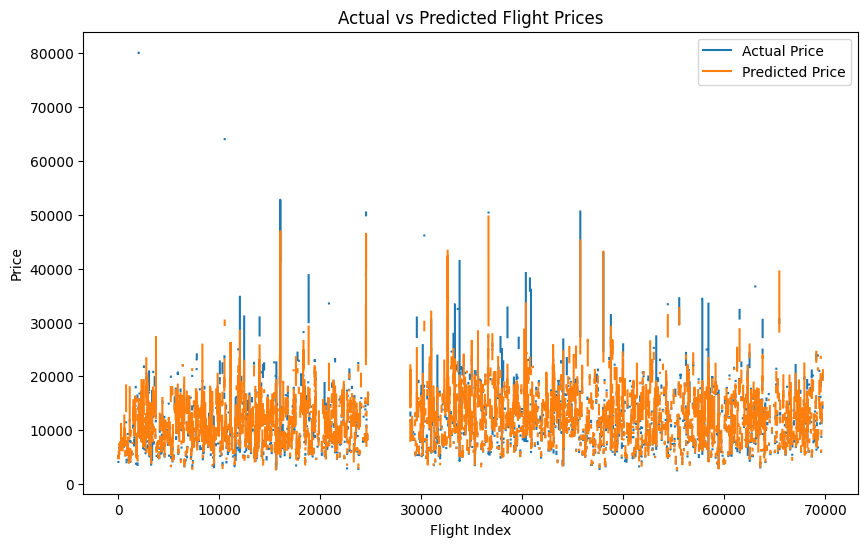

In [ ]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result = pd.merge(df_bk, out, left_index=True, right_index=True, how='left')
print(result.columns)

plt.figure(figsize=(10, 6))

plt.plot(result['Price_actual'], label='Actual Price')

plt.plot(result['Price_pred'], label='Predicted Price')
plt.xlabel('Flight Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted Flight Prices')
plt.legend()
plt.show()

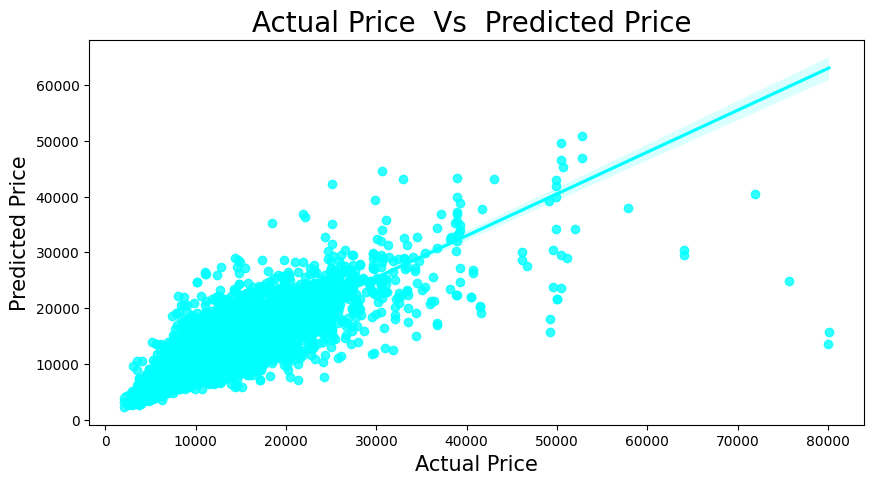

In [ ]:
from seaborn import regplot
import seaborn as sns

plt.figure(figsize=(10,5))
sns.regplot(x='Price_actual',y='Price_pred',data=result,color='cyan')
plt.title('Actual Price  Vs  Predicted Price ',fontsize=20)
plt.xlabel('Actual Price',fontsize=15)
plt.ylabel('Predicted Price',fontsize=15)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline




print(df.isnull().sum())

df.dropna(inplace=True)
df['date_of_departure'] = pd.to_datetime(df['date_of_departure'])
df['day_of_week'] = df['date_of_departure'].dt.dayofweek
df['month'] = df['date_of_departure'].dt.month


X = df[['airline', 'src_city', 'dest_city', 'duration', 'days_left', 'departure_time_category', 'arrival_time_category', 'day_of_week', 'month']]
y = df['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


categorical_features = ['airline', 'src_city', 'dest_city', 'departure_time_category', 'arrival_time_category']
numerical_features = ['duration', 'days_left', 'day_of_week', 'month']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('pass', 'passthrough')
        ]), numerical_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ])

flight_class               0
airline                    0
price                      0
src_city                   0
dest_city                  0
duration                   0
stops                      0
date_of_departure          0
day_of_week                0
month                      0
days_left                  0
departure_time_category    0
arrival_time_category      0
dtype: int64


In [ ]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42,max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=300, n_jobs = -1))
])

In [ ]:
model = pipeline

In [ ]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('pass',
                                                                   'passthrough')]),
                                                  ['duration', 'days_left',
                                                   'day_of_week', 'month']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['airline', 'src_city',
                                                   'dest_city',
                                                   'departure_time_category',
                                                   'arrival_time_category'])])),
                ('regressor',
                 RandomForestRegressor(max_depth=30, n_estimators=300,
                                       n_jobs=-1, random_state=42))])

In [ ]:
+from sklearn.metrics import mean_absolute_error

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)


def compute_duration_and_arrival(src_city, dest_city, departure_time_category, stops):
    city_pair_durations = {
        ('CityA', 'CityB'): 2.5,
        ('CityB', 'CityC'): 1.5,
        ('CityA', 'CityC'): 3.0
    }
    base_duration = city_pair_durations.get((src_city, dest_city), 2.0)
    duration = base_duration + (1.5 if stops == 1 else 0)


    arrival_time_category = {
        'morning': 'afternoon',
        'afternoon': 'evening',
        'evening': 'night',
        'night': 'morning'
    }.get(departure_time_category, 'afternoon')

    return duration, arrival_time_category


def predict_price():

    airline = input("Enter the airline: ")
    src_city = input("Enter the source city: ")
    dest_city = input("Enter the destination city: ")
    departure_time_category = input("Enter the departure time category (morning/afternoon/evening/night): ")
    days_left = int(input("Enter the number of days left until the flight: "))
    stops = int(input("Enter the number of stops (0 for non-stop, 1 for one-stop): "))

    duration, arrival_time_category = compute_duration_and_arrival(src_city, dest_city, departure_time_category, stops)

    today = pd.to_datetime(datetime.now().date())
    date_of_departure = today + pd.Timedelta(days=days_left)
    day_of_week = date_of_departure.dayofweek
    month = date_of_departure.month

    input_data = pd.DataFrame({
        'airline': [airline],
        'src_city': [src_city],
        'dest_city': [dest_city],
        'duration': [duration],
        'days_left': [days_left],
        'departure_time_category': [departure_time_category],
        'arrival_time_category': [arrival_time_category],
        'day_of_week': [day_of_week],
        'month': [month],
        'stops': [stops]
    })

    predicted_price = model.predict(input_data)[0]

    if stops == 1:
        lower_range = max(predicted_price - mae, 0)
        upper_range = predicted_price + mae
        print(f"Predicted price range for the flight: {lower_range:.2f} to {upper_range:.2f}")
    else:
        print(f"Predicted price of the flight: {predicted_price:.2f}")

    match_criteria = (
        (df['airline'] == airline) &
        (df['src_city'] == src_city) &
        (df['dest_city'] == dest_city) &
        (df['departure_time_category'] == departure_time_category) &
        (df['day_of_week'] == day_of_week) &
        (df['month'] == month) &
        (df['stops'] == stops)
    )
    nearest_datapoint = df[match_criteria].iloc[0] if not df[match_criteria].empty else None

    if nearest_datapoint is not None:
        actual_price = nearest_datapoint['price']
        percentage_error = abs(predicted_price - actual_price) / actual_price * 100
        print(f"Actual price from nearest datapoint: {actual_price:.2f}")
        print(f"Percentage error: {percentage_error:.2f}%")
    else:
        print("No exact matching datapoint found in the dataset to compute percentage error.")


predict_price()


Enter the airline: Indigo
Enter the source city: Delhi
Enter the destination city: Mumbai
Enter the departure time category (morning/afternoon/evening/night): afternoon
Enter the number of days left until the flight: 10
Enter the number of stops (0 for non-stop, 1 for one-stop): 0
Predicted price of the flight: 5169.69
No exact matching datapoint found in the dataset to compute percentage error.
